Pizza Price Prediction using XGBRegressor & RandomForestRegressor ML Model to predict the data

In [3]:
###  Import necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score


In [45]:

## Load Data from local drive

from google.colab import files
import io
uploaded = files.upload()

df1 = pd.read_csv(io.StringIO(uploaded['pizzadata.csv'].decode('utf-8')))


Saving pizzadata.csv to pizzadata (1).csv


In [46]:
df1.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


### Perform EDA & Data Preprocessing

In [47]:
df1.shape

(129, 9)

In [48]:
### Check for NULL values

df1.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [50]:
### Edit Price Column

### Renaming the Price Column

df1.rename({'price_rupiah':'price'}, axis = 1, inplace = True)


In [51]:
# Extract digits in Price column and convert to integer

df1.price = df1.price.str.replace('Rp','').str.replace(',','').astype(int)


In [52]:
df1.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [53]:

#  Edit Diameter Column


#  Extract digits in Diameter and Convert to integer

df1['diameter'] = df1['diameter'].str.extract('(\d+\.?\d*)').astype(float)


In [54]:
df1.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


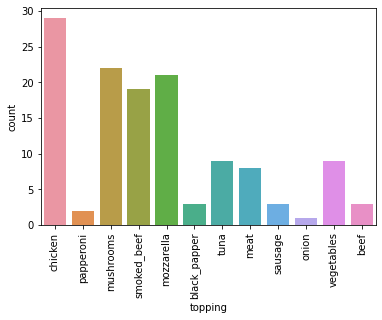

In [55]:
# Visualise Topping column

plt.figure(figsize=(6,4))
sns.countplot(x='topping', data=df1)
plt.xticks(rotation=90)

plt.show()

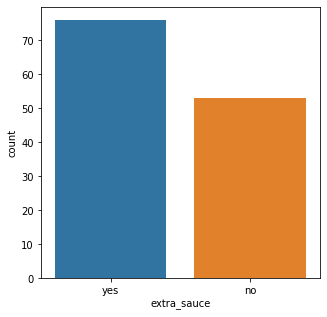

In [56]:
# Visualise Extra Sauce column

plt.figure(figsize=(5,5))
sns.countplot(x='extra_sauce', data=df1)
plt.show()

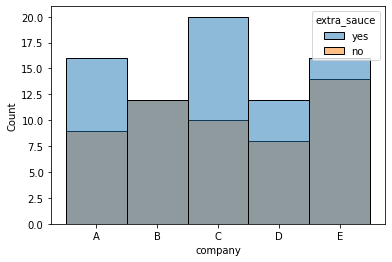

In [58]:
# Visualise Company column with Extra_Sauce

sns.histplot(data=df1, x="company",hue='extra_sauce')

plt.show()

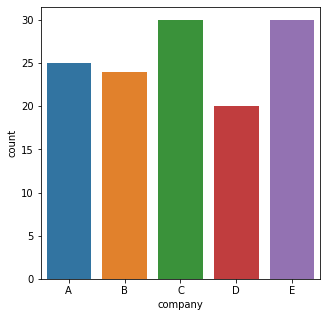

In [59]:
# Visualise Company column

plt.figure(figsize=(5,5))
sns.countplot(x='company', data=df1)
plt.show()

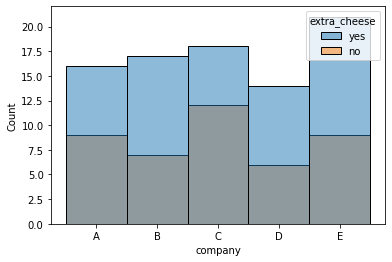

In [60]:
# Visualise Company column with Extra_Cheese

sns.histplot(data=df1, x="company",hue='extra_cheese')
plt.show()

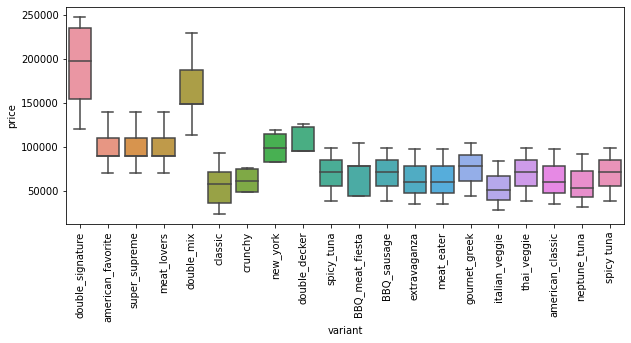

In [61]:
# Visualise Variant & Price column

plt.figure(figsize=(10,4))
sns.boxplot(data=df1, x='variant', y='price')
plt.xticks(rotation=90)

plt.show()

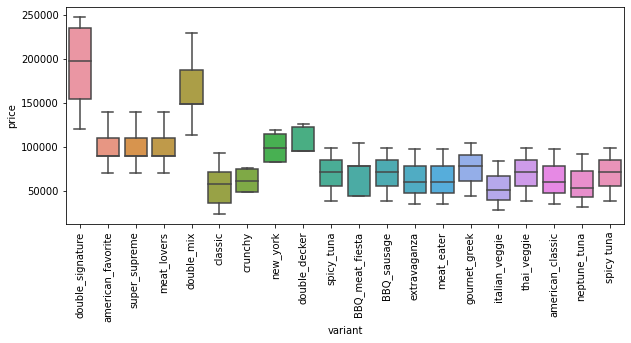

In [62]:
# Visualise Variant & Price column

plt.figure(figsize=(10,4))
sns.boxplot(data=df1, x='variant', y='price')
plt.xticks(rotation=90)

plt.show()

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price            129 non-null    int64  
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ KB


Label Encoding for changing Dtypes object to integer

In [64]:
### Convert remaining Columns to Integers

encoder = LabelEncoder()

In [65]:
df1['company'] = encoder.fit_transform(df1['company'])

df1['topping'] = encoder.fit_transform(df1['topping'])

df1['variant'] = encoder.fit_transform(df1['variant'])

df1['size'] = encoder.fit_transform(df1['size'])

df1['extra_sauce'] = encoder.fit_transform(df1['extra_sauce'])

df1['extra_cheese'] = encoder.fit_transform(df1['extra_cheese'])

df1['extra_mushrooms'] = encoder.fit_transform(df1['extra_mushrooms'])


In [66]:
df1.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000,22.0,2,8,1,1,1,0
1,0,198000,20.0,7,8,1,1,1,0
2,0,120000,16.0,5,8,4,1,1,1
3,0,155000,14.0,9,8,4,1,0,1
4,0,248000,18.0,4,8,1,1,0,1


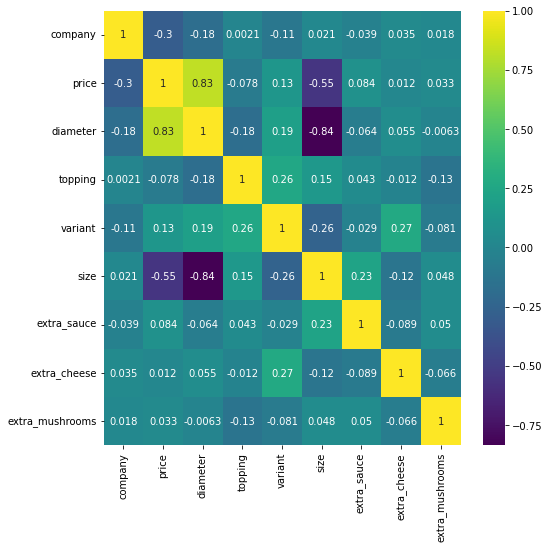

In [69]:
## Visualize Correlation using Heatmap

plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),annot=True,cmap='viridis')

plt.show()


Split Data into Dependent & Independent

In [70]:
X = df1.drop(columns='price', axis=1)

Y = df1['price']

Split the data into Training & Testing Data

In [71]:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)


In [72]:
print(X.shape, Xtrain.shape, Xtest.shape)

(129, 8) (103, 8) (26, 8)


Using XGBRegressor ML Model

In [73]:
regressor = XGBRegressor()

In [74]:
regressor.fit(Xtrain, Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [81]:
# predict training data

pred = regressor.predict(Xtrain)

In [76]:
### Check the accuracy for Train


regressor_accuracy = round(regressor.score(Xtrain, Ytrain)*100,2)

print(round(regressor_accuracy, 2), '%')

100.0 %


In [77]:
### Check the accuracy for Test data

regressor_accuracy1 = round(regressor.score(Xtest, Ytest)*100,2)

print(round(regressor_accuracy1, 2), '%')


91.33 %


In [78]:
# Check R squared Value

r2_train = metrics.r2_score(Ytrain, pred)

In [79]:
print('R Squared value = ', r2_train)

R Squared value =  0.9999999964535436


Using RandomForestRegressor ML Model

In [84]:

random_model = RandomForestRegressor(random_state = 42, n_jobs = -1)


In [88]:
### Predict Data

random_model.fit(Xtrain, Ytrain)

REF_pred = random_model.predict(Xtest)

print(REF_pred)


[ 86410.  89540.  72070.  84905.  30765.  85150.  40125.  50890. 170100.
 140215. 206250.  86260.  80355. 114550. 119190.  81270. 113180.  68310.
  67480.  76850.  31230. 167500. 203010.  81650.  87660.  42965.]


In [89]:
### Check the accuracy for Train

random_model_accuracy = round(random_model.score(Xtrain, Ytrain)*100,2)

print(round(random_model_accuracy, 2), '%')

98.4 %


In [90]:
### Check the accuracy for Test

random_model_accuracy1 = round(random_model.score(Xtest, Ytest)*100,2)

print(round(random_model_accuracy1, 2), '%')

87.64 %


In [91]:
### Check R Squared Value

r2_score(REF_pred, Ytest)

0.7902372385271049

In [92]:
### Display Actual and Predicted Data

pd.DataFrame(np.c_[Ytest , REF_pred], columns = ['Actual' , 'Predicted'])

,Actual,Predicted
0,72000.0,86410.0
1,105000.0,89540.0
2,54000.0,72070.0
3,60000.0,84905.0
4,23500.0,30765.0
5,90000.0,85150.0
6,75000.0,40125.0
7,39000.0,50890.0
8,188000.0,170100.0
9,149000.0,140215.0


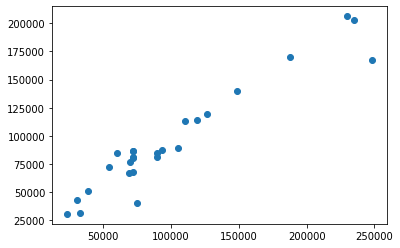

In [93]:
### Visualize Actual & Predicted Data


plt.scatter(Ytest, REF_pred)

plt.show()